# Reading the file and understanding the data

In [2]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [3]:
# Read CSV data for athlete events
athlete_events = pd.read_csv("athlete_events.csv")
# Read JSON data for regions
regions = pd.read_json("noc_regions.json", lines=True)

In [4]:
#Getting to know the data, by displaying structure and missing values in athlete_events and regions
athlete_events.info()
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

# Data Wrangling and data cleaning

In [6]:
# Merge athlete and region data on NOC 
olympics = pd.merge(athlete_events, regions, on='NOC', how='left')
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,None
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,None


In [7]:
# Check if the 'region' column was successfully added after merge
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [8]:
# Drop the 'notes' column as it's mostly empty and not useful
olympics.drop("notes", axis=1, inplace=True)

In [9]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [10]:
# Check for missing values in each column
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64

In [11]:
# Drop rows with any missing values
olympics = olympics.dropna()

In [12]:
# Check for missing values again after cleaning
olympics.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [13]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia


In [14]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30172 entries, 40 to 271103
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30172 non-null  int64  
 1   Name    30172 non-null  object 
 2   Sex     30172 non-null  object 
 3   Age     30172 non-null  float64
 4   Height  30172 non-null  float64
 5   Weight  30172 non-null  float64
 6   Team    30172 non-null  object 
 7   NOC     30172 non-null  object 
 8   Games   30172 non-null  object 
 9   Year    30172 non-null  int64  
 10  Season  30172 non-null  object 
 11  City    30172 non-null  object 
 12  Sport   30172 non-null  object 
 13  Event   30172 non-null  object 
 14  Medal   30172 non-null  object 
 15  region  30172 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 3.9+ MB


# Exploratory Data Analysis on the dataset

In [16]:
# Create a pivot table of medal counts by region and medal type
medal_table = olympics.pivot_table(index='region', columns='Medal', values='ID', aggfunc='count', fill_value=0)

# Add a total column to summarize medal counts across all types
medal_table['Total'] = medal_table.sum(axis=1)

# Sort the regions by total medals in descending order
medal_table = medal_table.sort_values('Total', ascending=False)

medal_table

Medal,Bronze,Gold,Silver,Total
region,,,,
USA,982,2115,1286,4383
Russia,1083,1465,1062,3610
Germany,1072,1102,1015,3189
Australia,477,319,414,1210
Italy,387,315,358,1060
...,...,...,...,...
Macedonia,1,0,0,1
Mauritius,1,0,0,1
Niger,0,0,1,1


In [17]:
# Save the pivot table summary to a CSV file
medal_table.to_csv('medal_summary_by_region.csv')

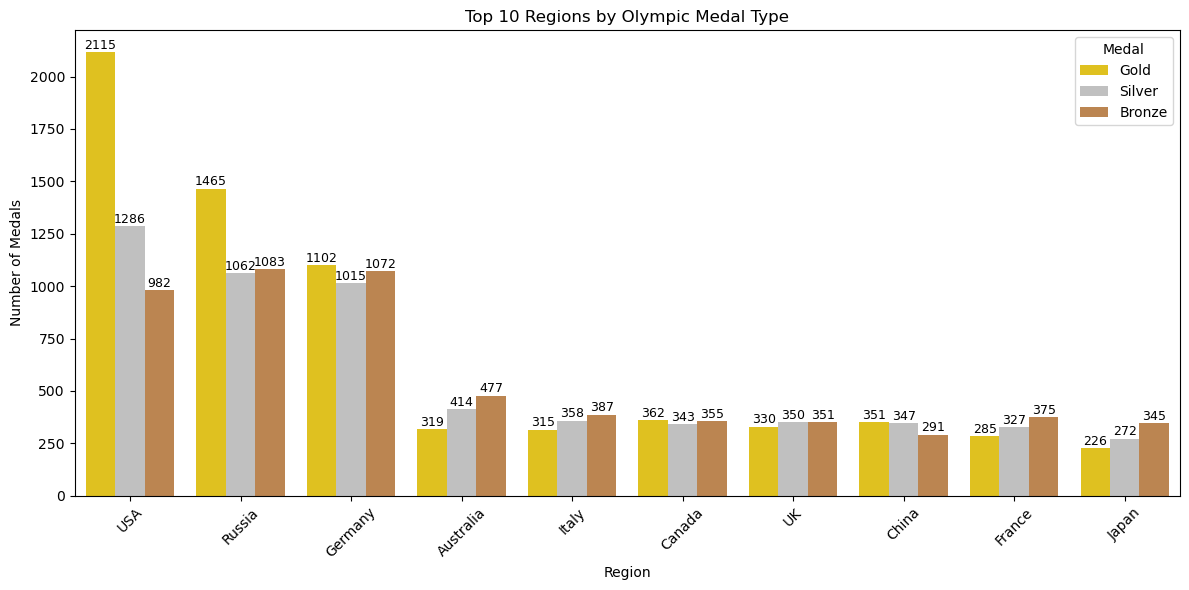

In [18]:
# Select the top 10 regions based on total medal count for visualization
top_10_regions = medal_table.sort_values('Total', ascending=False).head(10).reset_index()

# Convert the wide-format pivot table into long format for Seaborn compatibility
melted = pd.melt(top_10_regions,id_vars='region',value_vars=['Gold', 'Silver', 'Bronze'],var_name='Medal_Type',value_name='Count')

# Define a custom color palette for medal types
medal_palette = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}

# Plot grouped bar chart with medal counts per region
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted,x='region',y='Count',hue='Medal_Type',palette=medal_palette)

# Add data labels (medal counts) on each bar segment
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,height + 1,int(height),ha='center',va='bottom',fontsize=9,color='black')

# Final plot formatting
plt.title('Top 10 Regions by Olympic Medal Type') # Chart title
plt.xlabel('Region')                              # X-axis label
plt.ylabel('Number of Medals')                    # Y-axis label
plt.xticks(rotation=45)                           # Rotate x-axis labels for readability
plt.legend(title='Medal')                         # Add legend title
plt.tight_layout()                                # Adjust layout to prevent clipping
plt.show()                                        # Display the chart

In [19]:
# Group the data to count the number of medals won by each region in each Olympic year
medals_by_year_region = olympics.groupby(['Year', 'region'])['Medal'].count().reset_index()

# Rename the count column for clarity
medals_by_year_region.rename(columns={'Medal': 'Medal_Count'}, inplace=True)

# Filter the dataset to include only Olympic years from 2000 onwards
recent_medals = medals_by_year_region[medals_by_year_region['Year'] >= 2000]

# Identify the top 5 regions with the highest total medal counts since 2000
top_5_regions = recent_medals.groupby('region')['Medal_Count'].sum().nlargest(5).index

# Filter the data to include only rows related to the top 5 regions
top_regions_medals = recent_medals[recent_medals['region'].isin(top_5_regions)]

# Create a pivot table with Year as rows and Region as columns
# This reshapes the data for easy plotting of medal trends over time
medals_pivot_table = top_regions_medals.pivot(index='Year', columns='region', values='Medal_Count')

# Display the pivot table showing medal counts per region by year
medals_pivot_table

region,Australia,China,Germany,Russia,USA
Year,,,,,
2000,183,79,117,186,241
2002,2,16,61,38,83
2004,157,96,149,189,262
2006,2,13,54,41,52
2008,149,184,99,142,316
2010,3,19,54,25,97
2012,114,126,94,139,248
2014,3,12,36,58,64
2016,82,113,159,115,263


In [20]:
# Export the pivot table to a CSV file 
medals_pivot_table.to_csv('Top_5_regions_by_medals_from_the_year_2000.csv')

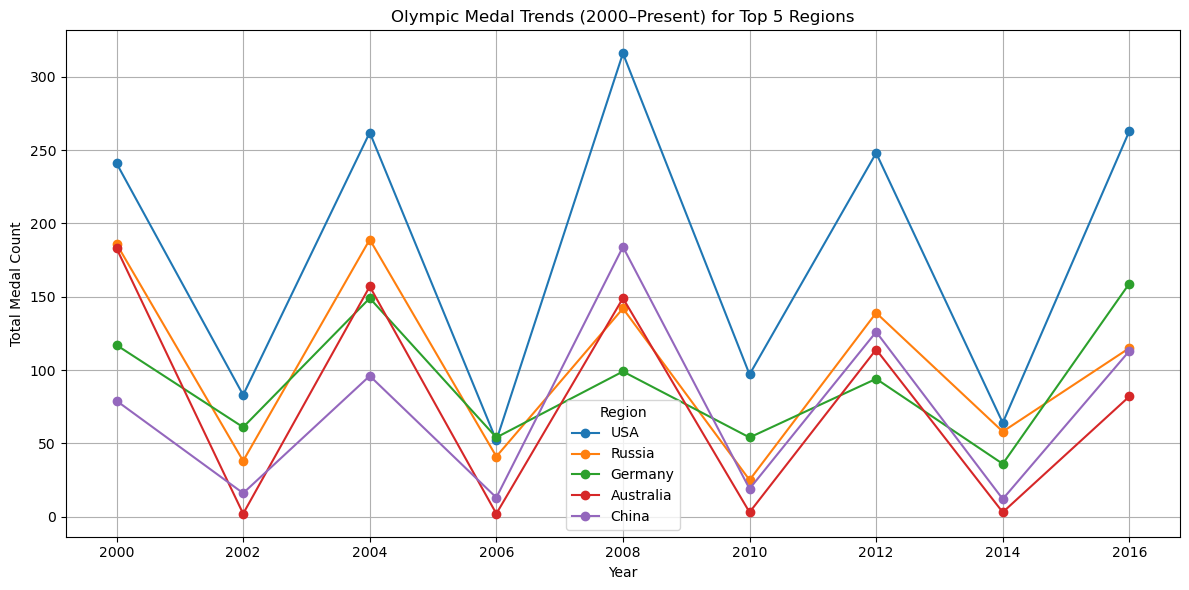

In [21]:
# Sort the regions (columns) by their total medal count across all years in descending order
medals_pivot_table = medals_pivot_table[medals_pivot_table.sum().sort_values(ascending=False).index]

# Plot a line chart showing medal trends over time for each of the top 5 regions
medals_pivot_table.plot(figsize=(12, 6), marker='o')

plt.title('Olympic Medal Trends (2000–Present) for Top 5 Regions') # Title of the chart
plt.xlabel('Year')                                                 # X-axis label
plt.ylabel('Total Medal Count')                                    # Y-axis label
plt.grid(True)                                                     # Add grid lines for easier readability of the trend
plt.legend(title='Region')                                         # Add legend with title showing which line represents which region
plt.tight_layout()                                                 # Adjust layout to avoid label overlap and ensure clean presentation
plt.show()                                                         # Display the final line chart

In [22]:
# Group the dataset by athlete name and region to count the number of medals each athlete has won
most_medals = olympics.groupby(['Name', 'region'])['Medal'].count().reset_index()

# Rename the medal count column for better clarity
most_medals.rename(columns={'Medal': 'Total_Medals'}, inplace=True)

# Sort the athletes by total medals in descending order and select the top 20
top_20_athletes = most_medals.sort_values('Total_Medals', ascending=False).head(20)

# Set 'Name' as the index to easily display athletes in the output
top_20_athletes.set_index('Name', inplace=True)

# Display the top 20 athletes with their region and total medal count
top_20_athletes

,region,Total_Medals
Name,,
"Michael Fred Phelps, II",USA,28
Larysa Semenivna Latynina (Diriy-),Russia,18
Nikolay Yefimovich Andrianov,Russia,15
Borys Anfiyanovych Shakhlin,Russia,13
Takashi Ono,Japan,13
Ole Einar Bjrndalen,Norway,13
Natalie Anne Coughlin (-Hall),USA,12
Ryan Steven Lochte,USA,12
"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,12


In [23]:
# Export the top 20 athletes with region and medal count to a CSV file
top_20_athletes.to_csv('top_20_olympians.csv')

<Figure size 1200x800 with 0 Axes>

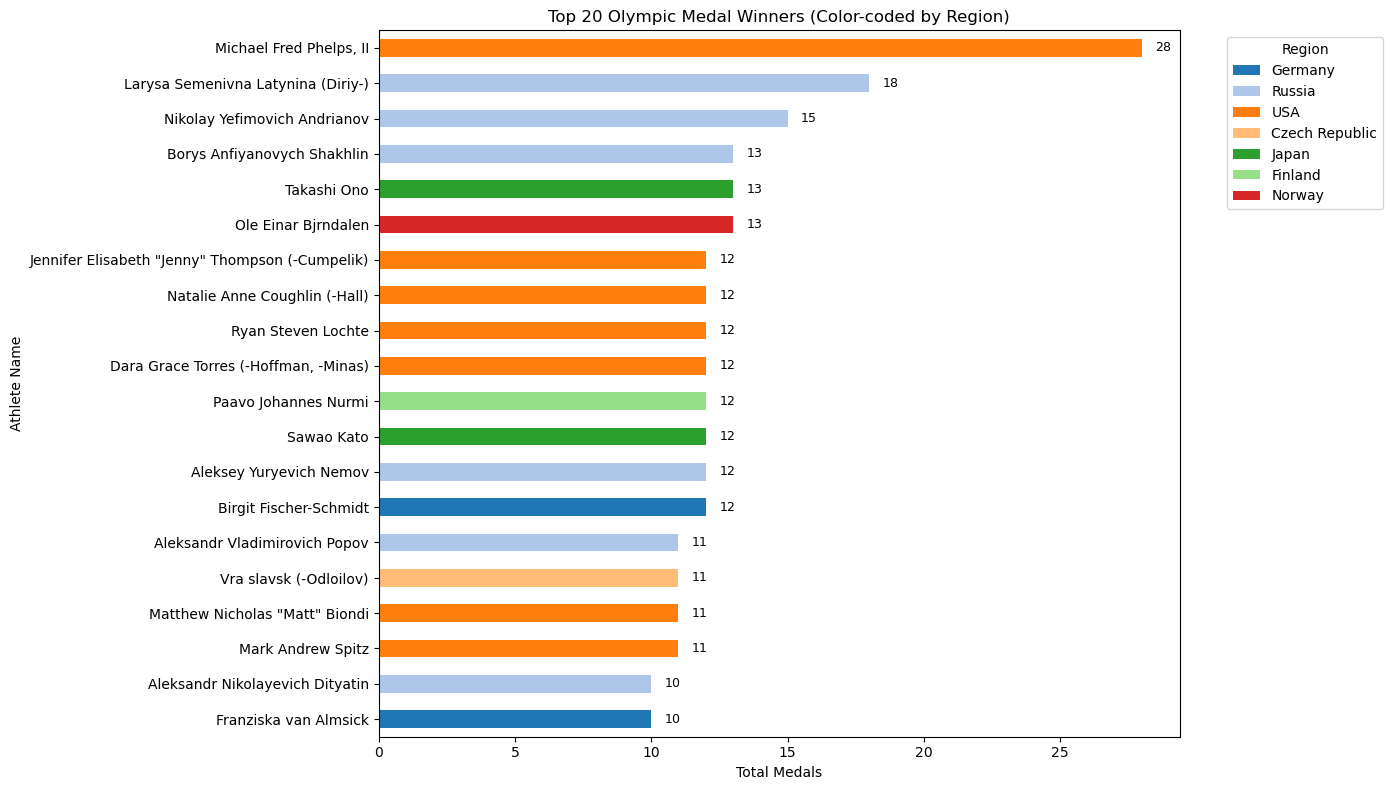

In [24]:
# Sort athletes by total medals in ascending order for better visualization (bottom = highest)
top_20_sorted = top_20_athletes.sort_values('Total_Medals')

# Extract unique regions from the top 20 athletes
regions = top_20_sorted['region'].unique()

# Create a color map using a distinct color palette (up to 20 colors)
color_palette = plt.cm.tab20.colors 
colors_map = dict(zip(regions, color_palette[:len(regions)]))

# Map each athlete's region to its assigned color
bar_colors = top_20_sorted['region'].map(colors_map)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = top_20_sorted.plot(kind='barh',y='Total_Medals',color=bar_colors,legend=False,figsize=(12, 8))

# Add total medal count as labels on each bar
for i, (value, name) in enumerate(zip(top_20_sorted['Total_Medals'], top_20_sorted.index)):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=9)

# Add chart title and axis labels
plt.title('Top 20 Olympic Medal Winners (Color-coded by Region)')
plt.xlabel('Total Medals')
plt.ylabel('Athlete Name')

# Ensure layout fits without overlap
plt.tight_layout()

# Create a custom legend to show region-color mapping
legend_elements = [Patch(facecolor=color, label=region) for region, color in colors_map.items()]
plt.legend(handles=legend_elements, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the final plot
plt.show()

In [25]:
# Group the data by region and sport, then count the number of medals for each sport within each country
medals_by_country_sport = olympics.groupby(['region', 'Sport'])['Medal'].count().reset_index()

# For each country (region), find the sport in which they have won the most medals
# This is done by sorting and keeping only the first (most-medaled) sport per region
most_medaled_sport_per_country = medals_by_country_sport.sort_values('Medal', ascending=False) \
    .groupby('region').first().reset_index()

# Rename columns 
# 'Sport' becomes 'Top_Sport' and 'Medal' becomes 'Medal_Count'
most_medaled_sport_per_country.rename(columns={'Sport': 'Top_Sport','Medal': 'Medal_Count'}, inplace=True)

# Sort the final table by medal count in descending order so that countries with the most dominant top sport appear first
most_medaled_sport_per_country = most_medaled_sport_per_country.sort_values('Medal_Count', ascending=False)

# Set 'region' as the index to make the output easier to read and align by country
most_medaled_sport_per_country.set_index('region', inplace=True)

# Display the final result showing each region's most successful sport and the total medals won in that sport
most_medaled_sport_per_country

,Top_Sport,Medal_Count
region,,
USA,Athletics,1009
Germany,Rowing,395
Russia,Athletics,370
Australia,Swimming,351
Canada,Ice Hockey,281
...,...,...
Sudan,Athletics,1
Sri Lanka,Athletics,1
Macedonia,Wrestling,1


In [26]:
# Export the table showing each country's top sport by medal count to a CSV file
most_medaled_sport_per_country.to_csv('top_sport_per_country.csv')

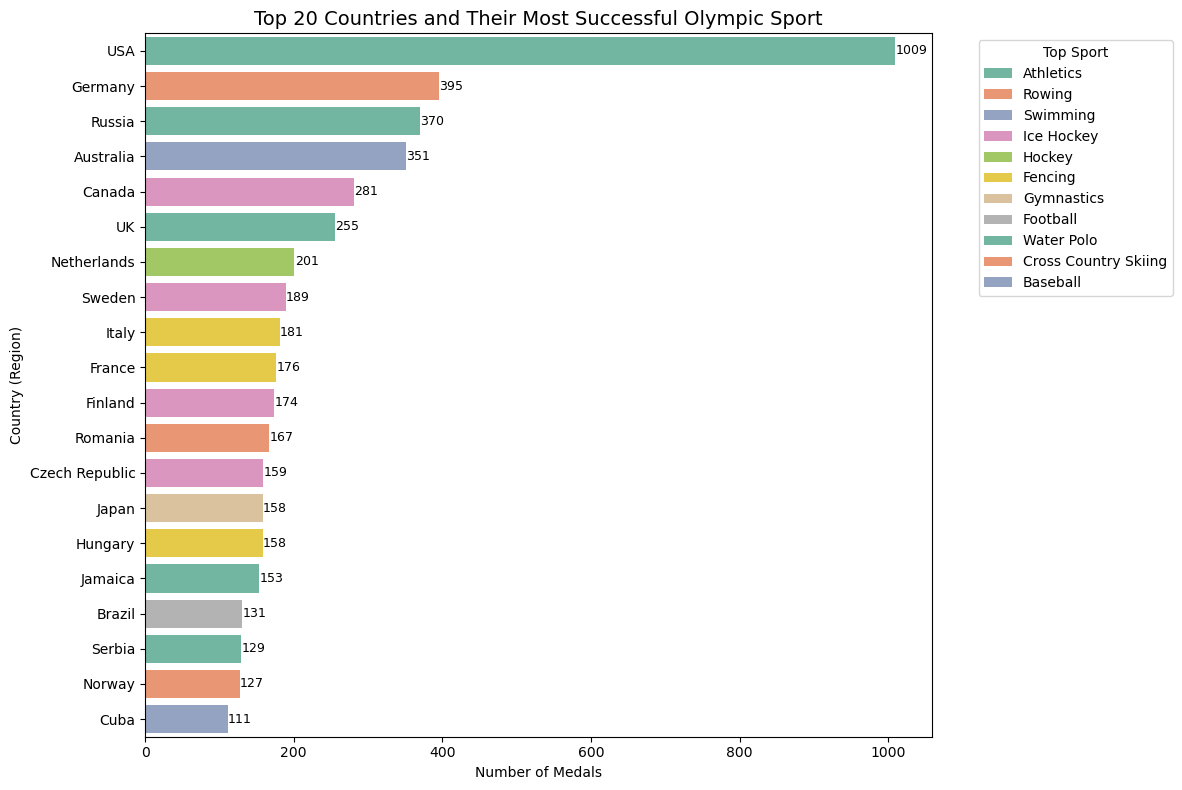

In [27]:
#Select the top 20 countries with the highest medal counts in their most successful sport
top_20_sports_by_country = most_medaled_sport_per_country.head(20).reset_index()

# Create a unique color palette for each sport in the top 20 list
unique_sports = top_20_sports_by_country['Top_Sport'].unique()

# Using Seaborn's Set2 palette for soft, visually appealing category colors
styled_palette = sns.color_palette("Set2", len(unique_sports))
sport_color_map = dict(zip(unique_sports, styled_palette))

# Plot a horizontal bar chart using Seaborn
# Each bar represents the top sport for a country, and is color-coded accordingly
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top_20_sports_by_country,
    x='Medal_Count',
    y='region',
    hue='Top_Sport',
    dodge=False,
    palette=sport_color_map
)

# Annotate each bar with the exact medal count
for index, row in top_20_sports_by_country.iterrows():
    ax.text(row['Medal_Count'] + 0.5, index, row['Medal_Count'], va='center', fontsize=9)

# Final formatting for a clean and professional chart
plt.title('Top 20 Countries and Their Most Successful Olympic Sport', fontsize=14)
plt.xlabel('Number of Medals')
plt.ylabel('Country (Region)')
plt.legend(title='Top Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
